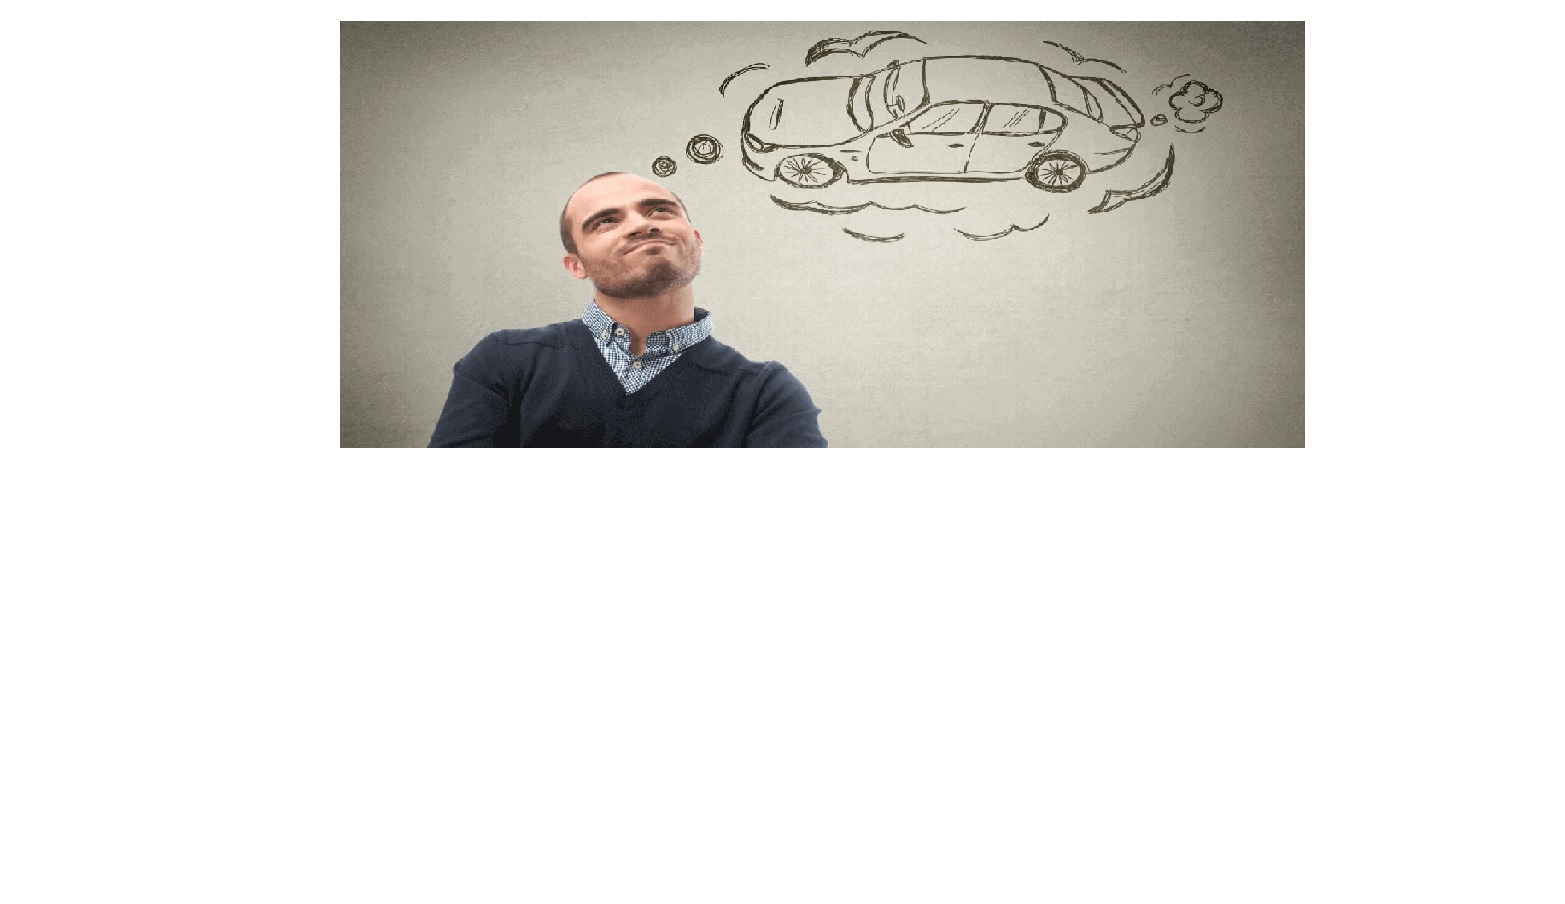

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

# <p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
<a name = Section1></a>
# **1. Introduction**
---

- India's Used Car Market is growing steadily with
    - Sales - 4.3 Million
    - Growth - 18%
    - Holding Time - 3 to 4 Years
- There are mainly 2 segments 
    - Organized segment
    - Unorganized segment
- The organised segment is seeing rewarding growth and is expected to touch the skies in the coming years
- Main challenges of the Used Cars market 
    - Trustworthiness from customers angle
    - Quality of cars
- Approaching this market with differentiated Business models and increasing the Buyer-enthusiasm in this competitive landscape is an absolute need of the hour

---
<a name = Section2></a>
# **2. Problem Statement**
---


### To Perform Exploratory Data Analysis (EDA) in order to update the strategy and shift focus towards clearance of unsold cars residing for > 10 years and bringing in new process of keeping only registered cars leading to immediate revenue generation

 ---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

###### **Installing Libraries**

In [126]:
!pip install -q datascience                                        
!pip install -q pandas-profiling   

###### **Upgrading Libraries**

In [127]:
!pip install -q --upgrade pandas-profiling

###### **Importing Libraries**

In [128]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|

###### **Data Acquisition**

In [129]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', data.shape)
data.head()

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [130]:
copydata = data.copy() # Copy the original dataset in temp variable copydata as best practice

In [131]:
copydata.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

###### **Data Description**

In [132]:
copydata.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


---
Observations
---
There are 10 columns in the given data set, 3 of which are CONTINUOUS and 7 being CATEGORICAL in nature

|Id|Feature|Variable Type|
|:--|:--|:--|
|01| car           | CATEGORICAL| 
|02| model         | CATEGORICAL|  
|03| year          | CATEGORICAL| 
|04| body          | CATEGORICAL|   
|05| mileage       | CONTINUOUS|
|06| engV          | CONTINUOUS|
|07| engType       | CATEGORICAL|
|08| drive         | CATEGORICAL|
|09| registration  | CATEGORICAL|
|10| price         | CONTINUOUS|

---

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

##### Finding Duplicates

In [133]:
copydata.duplicated().value_counts()

False    9463
True      113
dtype: int64

###### The Used cars dataset has 113 duplicate rows. These rows should be removed while Pre-Processing

###### Finding Missing values


Preview of data with null values:
xxxxxxxxxxxxx
              car    price   body  mileage  engV engType registration  year  \
4   Mercedes-Benz  33000.0  vagon       91   NaN   Other          yes  2013   
13            BMW   4700.0  sedan      200   NaN  Petrol          yes  1996   
30         Nissan  13980.0  hatch       31   NaN   Other          yes  2013   

      model  drive  
4   E-Class    NaN  
13      316   rear  
30     Leaf  front  


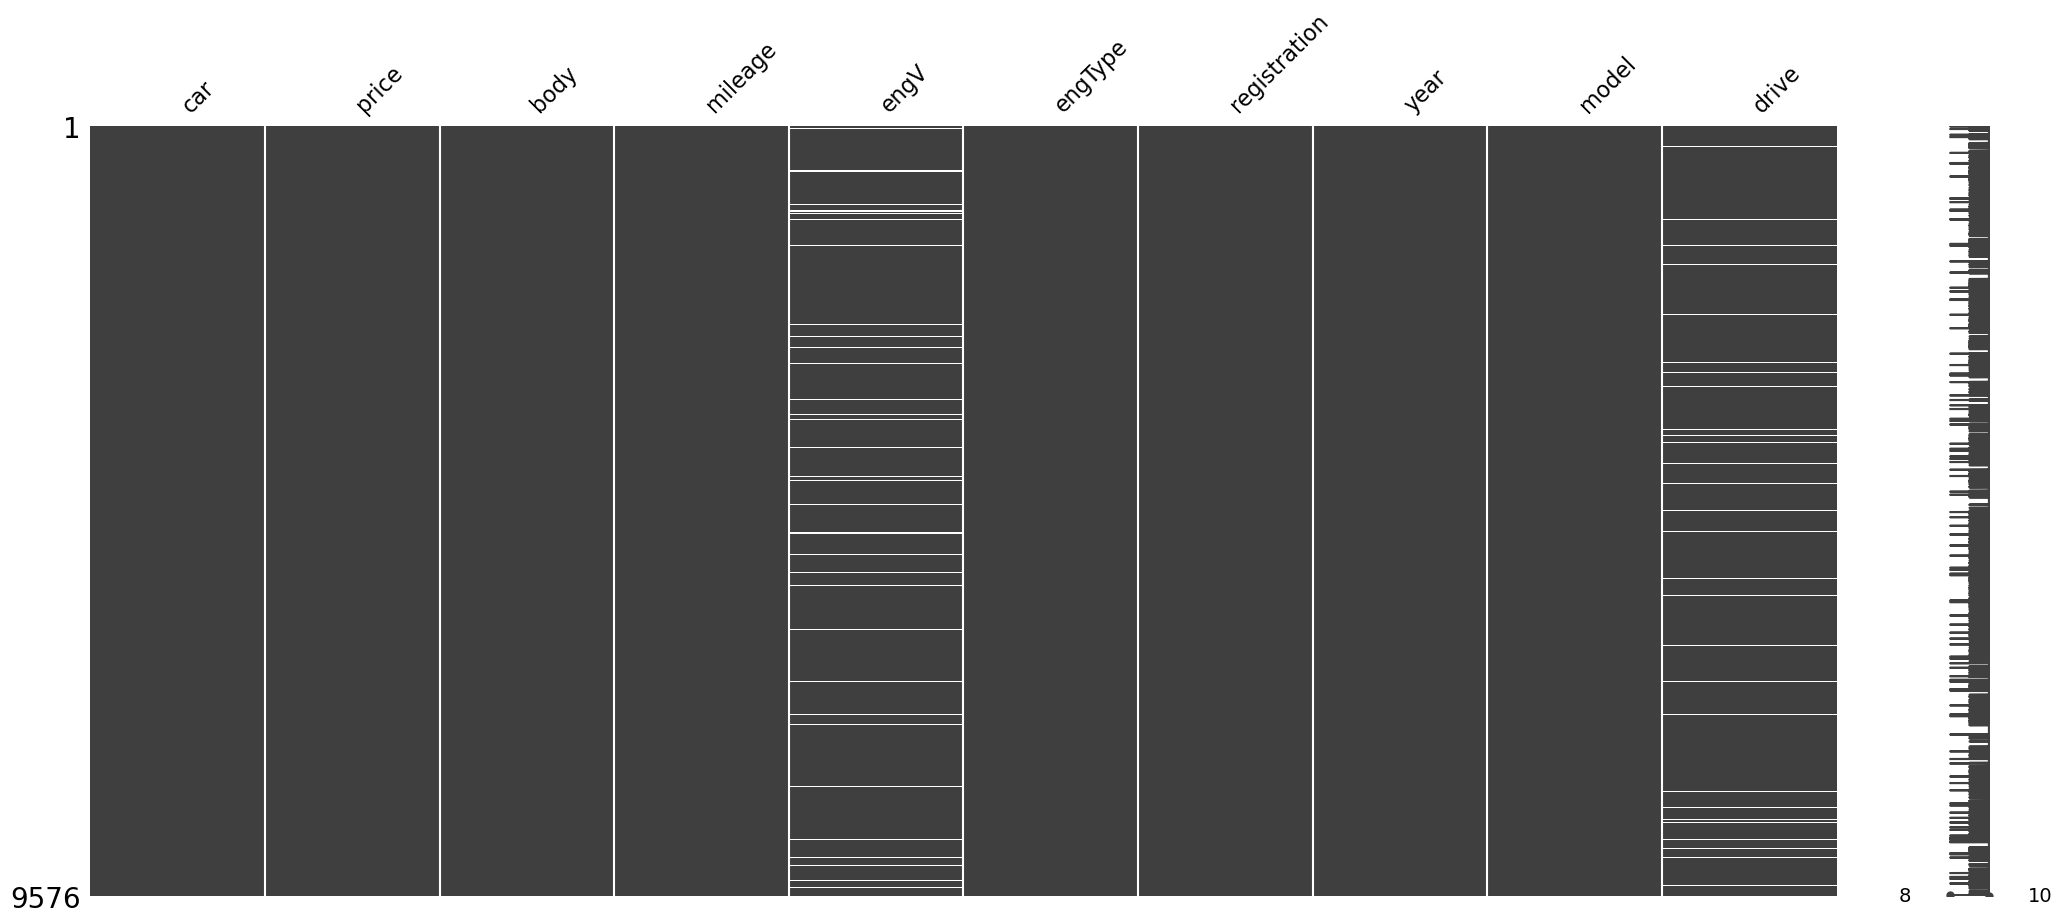

In [134]:
# generate preview of entries with null values

!pip install missingno
import missingno as msno

if copydata.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(copydata[copydata.isnull().any(axis=1)].head(3))
    msno.matrix(copydata)
    plt.show()

In [135]:
copydata.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

###### Used cars dataset has 434 missing values in engine version column and 511 values missing under drive column

###### Detection of Typos, Inconsistencies in data types


In [136]:
copydata.nunique(axis=0,dropna=True)

car               87
price           1353
body               6
mileage          442
engV             117
engType            4
registration       2
year              56
model            888
drive              3
dtype: int64

In [137]:
copydata.price[copydata.price == 0].count()

267

In [138]:
copydata.price[copydata.mileage == 0].count()

348

###### ---
1.There are 113 duplicate data \
2.There are missing values in engV(434) and drive columns(511) and they have to be removed while data pre processing \
2a. Missing values in drive column can be handled by filling with MODE of  the drive column \
2b. Missing values in engV column can be handled by replacing the NA with 30, as 30 is the max value that petrol and diesel \
engines of the car make/model that are present in the given dataset \


3.There are 0 as value in 267 rows in price and 348 rows in mileage columns. \
3a.The zero in Price column can be replaced by mean of prices \
3b.The zero in mileage column should be treated as outlier and has to be handled \

---
<a name = Section5></a>
# **5. Data Pre-Processing**
---

---
<a name = Section5.1></a>
# **5.1 Handling Duplicates**
---

In [139]:
#Duplicate data detection
copydata.duplicated().value_counts()

False    9463
True      113
dtype: int64

In [140]:
copydata=copydata.drop_duplicates()

In [141]:
copydata.duplicated().value_counts()

False    9463
dtype: int64

#### ---
Observation: Duplicate rows have been removed from the used cars dataset. As it can be seen, there are only False vlaues \
    when the .duplicated() function was used 

---
<a name = Section5.2></a>
# **5.2 Handling Missing values**
---

In [142]:
# Missing value detection
copydata.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64

---
<a name = Section5.2.1></a>
# **5.2.1 Handling Missing values in drive column**
---

---
Drive column is a categorical variable. Finding the Mode of the column and replacing missing values with mode would be the approach
Find the mode for the drive column 

In [143]:
copydata['drive'].mode()

0    front
Name: drive, dtype: object

In [144]:
#Replace the missing values in drive column with mode=front
copydata['drive']=copydata['drive'].fillna(copydata['drive'].mode()[0])

In [145]:
copydata.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive             0
dtype: int64

#### ---
Observation: The 511 missing vlaues under drive column have been replaced with Mode of that column. 
Hence there are no missing values in the data set now

---
<a name = Section5.2.2></a>
# **5.2.2 Handling Missing values in engV column**
---

---
engV column is a categorical variable. This column has missing values (NA), outliers like values >30 \
The idea is to first replace the missing values with 30 as we have decided to keep 30 as the highest engine version  \
a petrol or diesel engine culd have amongst the cars in our given data set \
We later deal with the outliers which are engV values >30

In [146]:
# Learn more about the variable engV
print("Distinct responses for engineVersion (Frequency):", len(set(copydata['engV'])))
print("Distinct responses for engineVersion:", set(copydata['engV']))

Distinct responses for engineVersion (Frequency): 551
Distinct responses for engineVersion: {nan, 1.5, 2.5, 2.0, 2.2, 5.5, nan, 4.8, 5.0, 3.0, 4.4, nan, nan, nan, 8.3, 14.0, 3.5, 17.0, 15.0, 19.0, 20.0, 4.5, 4.0, 4.25, 18.0, 22.0, 28.0, 30.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 7.0, 8.0, 9.0, 10.0, 55.0, 11.5, 12.0, 66.0, 70.0, 74.0, 75.0, 85.0, 90.0, 99.99, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 6.75, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.66, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.6, 5.6, 6.1, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.8, 1.8, 1.3, 1.34, 1.39, 1.59, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.79, 5.2, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2.15, nan, nan, nan, nan, nan, nan, nan, nan

In [147]:
copydata.replace(to_replace = np.nan, value =30.0, inplace=True)

In [148]:
copydata.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

---
Observation: The missing vlaues under engV has been handled and now we have 0 missing values in the entire dataset

In [149]:
print("Distinct responses for engineVersion:", set(copydata['engV']))  

Distinct responses for engineVersion: {0.8, 1.8, 2.5, 2.0, 1.5, 5.5, 2.2, 1.2, 4.8, 5.0, 3.0, 4.4, 3.5, 5.7, 1.0, 8.3, 14.0, 17.0, 9.0, 19.0, 20.0, 4.5, 4.0, 15.0, 4.25, 18.0, 22.0, 28.0, 30.0, 6.0, 1.25, 6.5, 6.75, 7.0, 8.0, 10.0, 1.36, 55.0, 11.5, 12.0, 66.0, 70.0, 1.79, 74.0, 75.0, 85.0, 90.0, 99.99, 1.9, 1.4, 2.4, 2.9, 2.15, 3.4, 1.33, 5.4, 6.4, 2.69, 2.44, 1.12, 2.8, 2.3, 3.8, 3.3, 4.3, 1.3, 5.3, 6.3, 1.23, 2.98, 1.91, 0.6, 0.65, 0.9, 0.14, 4.66, 1.34, 1.59, 0.11, 8.7, 0.7, 1.7, 1.45, 0.1, 2.7, 3.2, 3.7, 4.7, 4.2, 5.2, 6.2, 7.2, 1.31, 1.24, 2.99, 2.49, 2.17, 4.6, 4.67, 5.6, 6.1, 1.6, 1.1, 1.35, 2.6, 2.1, 2.28, 3.6, 3.1, 1.78, 1.46, 2.46, 4.39, 1.39, 5.46, 2.57, 2.14}


---
<a name = Section5.3></a>
# **5.3 Handling Outliers**
---

---
<a name = Section5.3.1></a>
# **5.3.1 Handling outliers of engV>30**
---

In [150]:
copydata['engV'].describe()

count    9463.000000
mean        3.896185
std         8.166003
min         0.100000
25%         1.600000
50%         2.000000
75%         2.800000
max        99.990000
Name: engV, dtype: float64

In [151]:
copydata['engV'].unique()

array([ 2.5 ,  1.8 ,  5.5 , 30.  ,  2.  ,  1.5 ,  2.2 ,  1.2 ,  4.8 ,
        5.  ,  3.  ,  4.4 ,  1.6 ,  2.98,  2.4 ,  2.8 ,  3.5 ,  2.99,
        1.9 ,  1.7 ,  4.5 ,  3.6 ,  1.4 ,  2.7 ,  4.  ,  3.8 ,  5.7 ,
       99.99,  3.2 ,  3.7 ,  4.7 ,  1.  , 19.  ,  4.6 ,  0.11,  4.2 ,
        0.8 ,  2.3 ,  6.2 ,  1.3 ,  6.  ,  2.6 ,  0.6 ,  1.25,  5.46,
        6.3 ,  5.6 ,  8.3 ,  3.3 ,  1.1 ,  6.1 ,  0.65,  1.78,  2.1 ,
        3.4 ,  7.  ,  1.46,  5.2 , 75.  ,  6.5 ,  1.23, 17.  ,  8.  ,
        2.9 ,  1.34,  0.7 ,  1.39, 90.  ,  5.3 ,  4.67, 20.  , 14.  ,
       11.5 ,  1.45,  9.  , 10.  ,  4.66, 15.  ,  0.9 , 12.  ,  2.57,
        1.91,  1.33,  2.49,  1.12,  1.36,  2.14, 55.  ,  4.39,  6.75,
        1.59, 28.  ,  8.7 ,  3.1 ,  2.15,  4.3 ,  4.25,  7.2 , 85.  ,
        5.4 , 66.  ,  2.69,  1.24, 18.  , 22.  , 70.  ,  2.44,  6.4 ,
        1.35,  2.17,  2.46,  2.28,  1.79,  0.14,  1.31,  0.1 , 74.  ])

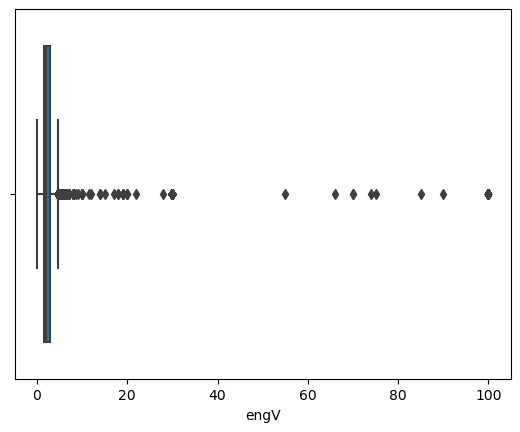

In [152]:
sns.boxplot(x=copydata['engV'])
plt.show()

<AxesSubplot:xlabel='engType', ylabel='engV'>

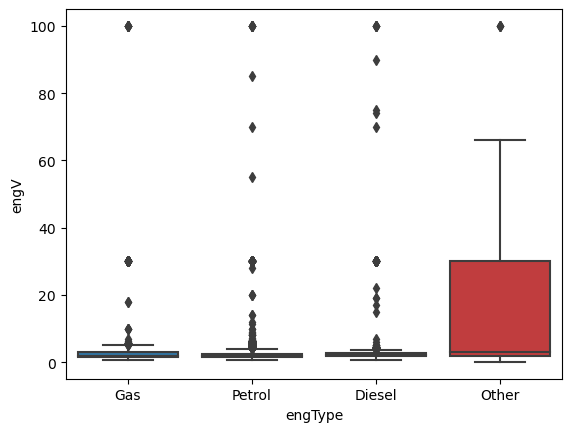

In [153]:
#Box plot of engV across different engine types to view a representation of outliers
sns.boxplot(x=copydata.engType,y=copydata.engV)

In [154]:
#Outlier removal on engV column using IQR
Q1=copydata['engV'].quantile(0.25)
Q3=copydata['engV'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

1.6
2.8
1.1999999999999997


In [155]:
# Filtering values within (Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR) and creating a dataframe called copydata_out to 
copydata_out = copydata[~((copydata['engV'] < (Q1 - 1.5 * IQR)) |(copydata['engV'] > (Q3 + 1.5 * IQR)))]
copydata_out.shape

(8603, 10)

In [156]:
copydata.shape

(9463, 10)

<AxesSubplot:xlabel='engType', ylabel='engV'>

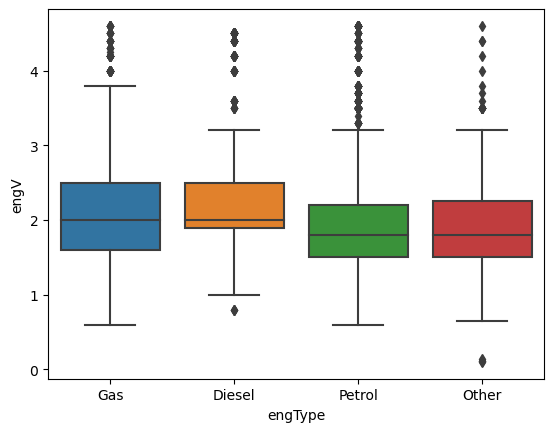

In [157]:
# Re-plottin Box plot to verify the removal of outliers and reduced Shape of the data set from 9463 to 8603
sns.boxplot(x=copydata_out.engType,y=copydata_out.engV)

In [158]:
print("Distinct responses for engineVersion:", set(copydata_out['engV']))  

Distinct responses for engineVersion: {0.8, 1.8, 2.5, 2.0, 1.5, 2.2, 1.2, 3.0, 4.4, 1.6, 2.98, 2.4, 2.99, 4.5, 1.0, 1.25, 3.5, 2.49, 2.17, 4.0, 4.6, 1.34, 1.59, 0.6, 4.25, 0.11, 1.1, 1.35, 2.6, 2.1, 2.69, 2.44, 2.28, 3.6, 0.7, 3.1, 1.7, 1.78, 1.45, 1.36, 0.1, 1.33, 1.46, 1.12, 1.79, 2.8, 2.7, 2.3, 2.46, 3.8, 3.2, 3.7, 3.3, 4.2, 1.3, 1.39, 4.39, 4.3, 0.14, 1.9, 1.4, 1.23, 0.65, 0.9, 2.9, 2.57, 2.14, 2.15, 1.31, 3.4, 1.91, 1.24}


---
Observation: The outliers in column engV have been removed 

---
<a name = Section5.3.2></a>
# **5.3.2 Handling outliers of price=0**
---

In [159]:
print("price")
print("How many values are NaN?: ", pd.isnull(copydata_out['price']).sum())
print("How many values are 0? : ", copydata_out.price[copydata_out.price == 0].count())    # finding the outliers in price

price
How many values are NaN?:  0
How many values are 0? :  207


In [160]:
copydata_out=copydata_out.loc[(copydata_out[['price']] != 0).all(axis=1)]

In [161]:
print("price")
print("How many values are NaN?: ", pd.isnull(copydata_out['price']).sum())
print("How many values are 0? : ", copydata_out.price[copydata_out.price == 0].count())    # finding the outliers in price

price
How many values are NaN?:  0
How many values are 0? :  0


---
Observation: Price =0 rows have been excluded from the data set now

---
<a name = Section5.3.3></a>
# **5.3.3 Handling outliers of mileage=0**
---

In [162]:
print("mileage")
print("How many values are NaN?: ", pd.isnull(copydata_out['mileage']).sum())
print("How many values are 0? : ", copydata_out.mileage[copydata_out.mileage == 0].count())    # finding the outliers in mileage

mileage
How many values are NaN?:  0
How many values are 0? :  247


In [163]:
copydata_out=copydata_out.loc[(copydata_out[['mileage']] != 0).all(axis=1)]

In [164]:
print("mileage")
print("How many values are NaN?: ", pd.isnull(copydata_out['mileage']).sum())
print("How many values are 0? : ", copydata_out.mileage[copydata_out.mileage == 0].count())    # finding the outliers in mileage

mileage
How many values are NaN?:  0
How many values are 0? :  0


In [165]:
---
Observation: Rows with Mileage =0 have been excluded from the data set

SyntaxError: invalid syntax (2765406086.py, line 1)

In [166]:
copydata_out.shape

(8149, 10)

---
After removal of outliers in engV, price and mileage, the dataset now contains 8149 rows

---
<a name = Section6></a>
# **6. Exploratory Data Analysis**
---

# <a name = Section62></a>
# Question 1: What are the best selling car brands under top 10 category?

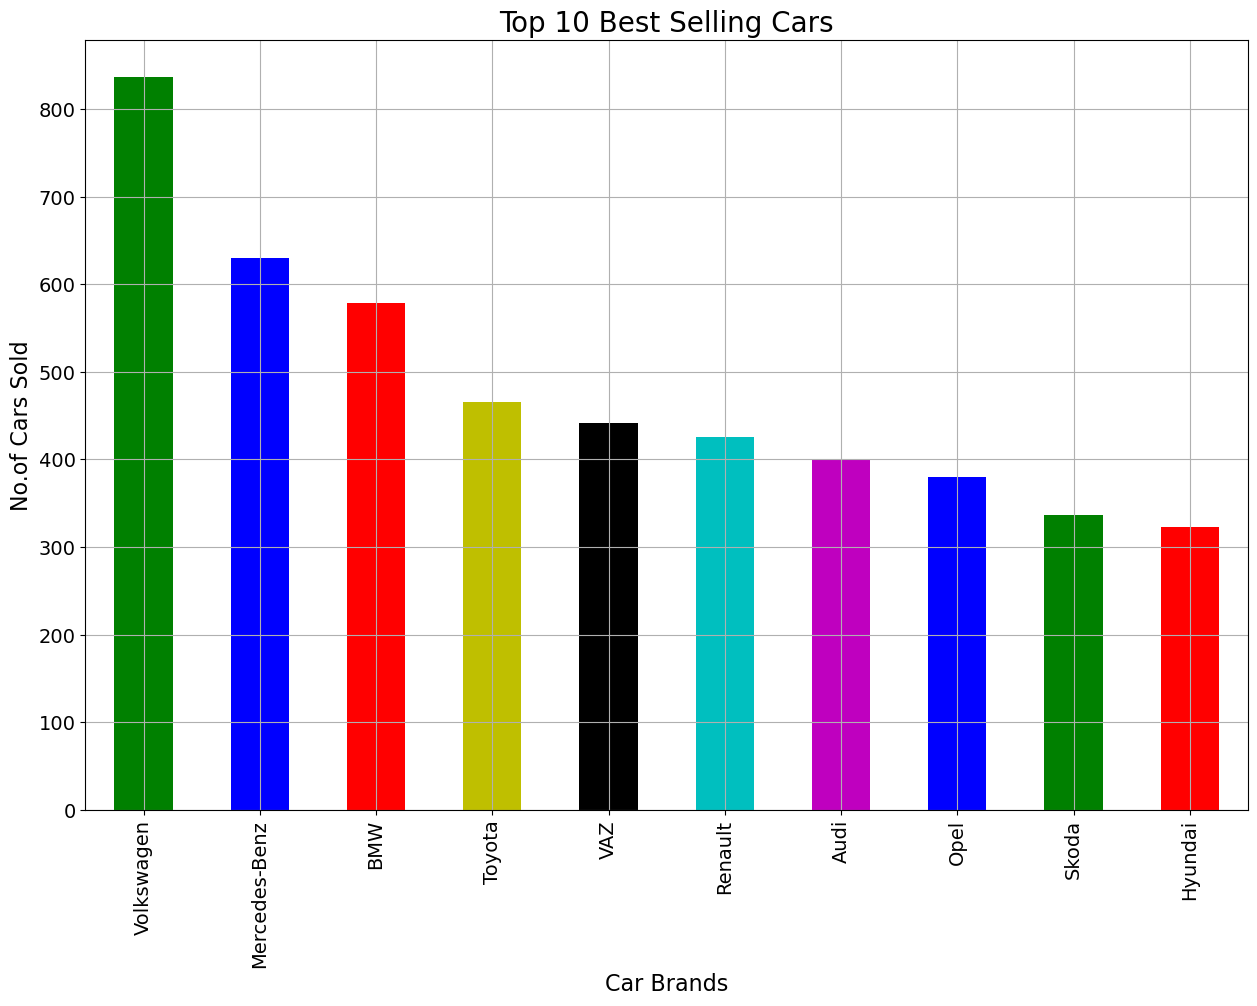

In [167]:
# Create a 15x10 inches figure
fig = plt.figure(figsize=(15, 10))

# Creating a barplot for car brand vs. no.of units sold
copydata_out['car'].value_counts().head(10).plot.bar(color=tuple(['g', 'b','r','y','k','c','m','b','g','r']))

# Adding plot style
plt.xlabel(xlabel='Car Brands', fontsize=16)
plt.ylabel(ylabel='No.of Cars Sold', fontsize=16)
plt.title(label='Top 10 Best Selling Cars', fontsize=20)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(visible=True)


### **Observation:** **Volkswagen & Mercedes-Benz** scored highest number of sales crossing more than 800 units with Hyundai being the least under top 10 category. 

# <a name = Section62></a>
# Question 2: What is the Percentage of Sold Cars per engType?

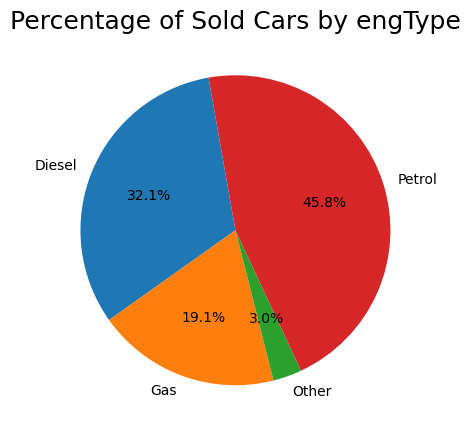

In [168]:
# Creating a custom figure size of 15 X 10 inches
figure = plt.figure(figsize=[5, 10])


ct = pd.value_counts(copydata_out['engType'].values, sort=False)
labels = copydata_out['engType'].unique()
labels.sort()
sizes = ct
ct.sort_index(inplace=True)

# Creating a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=100)

# Adding plot style
plt.title(label='Percentage of Sold Cars by engType', size=18)
plt.show()

Observation:Petrol cars are most sold engine types and Other (Electric etc) are the least sold \
Insight: If the used car dealer has to enter the market of reselling Electric cars, a new strategy should be considered in selling

# <a name = Section64></a>
# Question 3: What is the most preferred body type of cars?

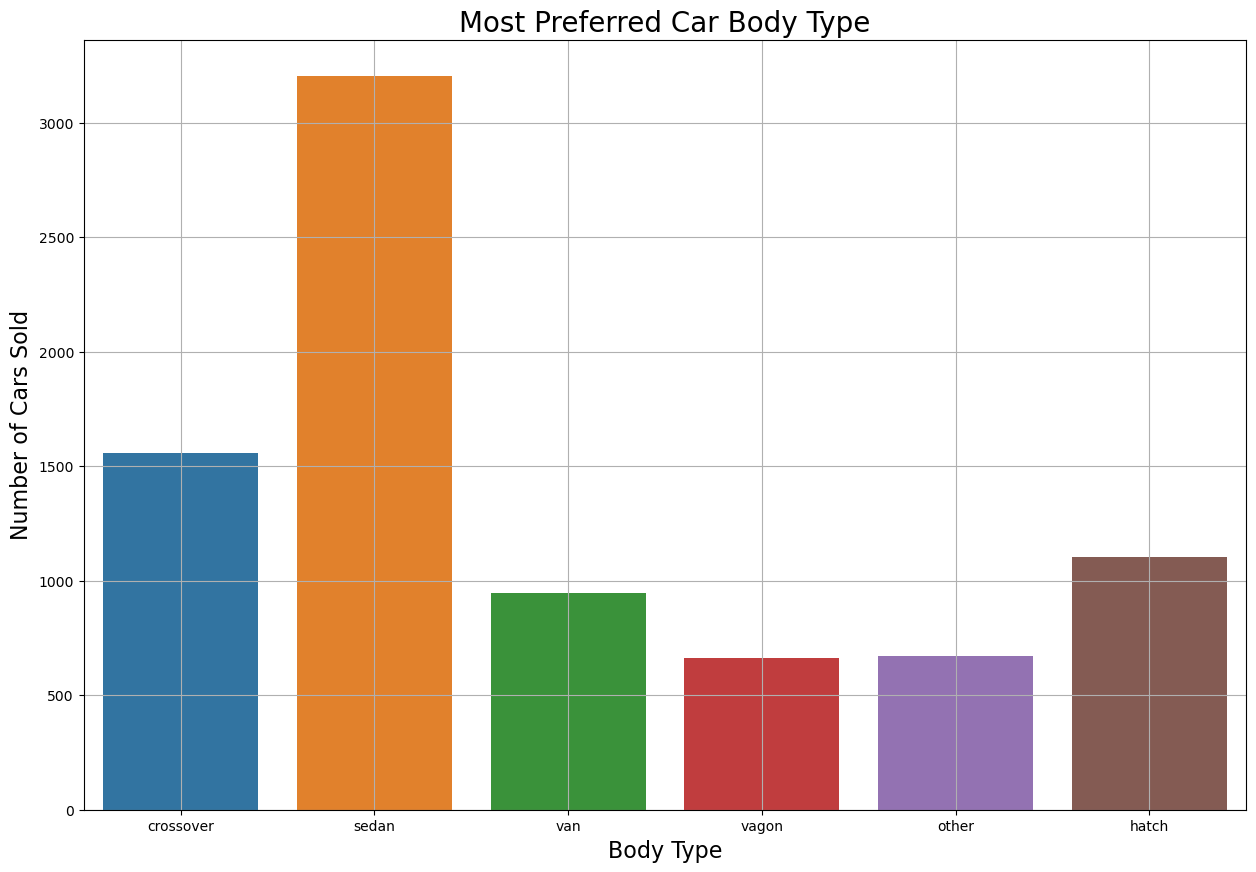

In [169]:
# Create a 15x10 inches figure
fig = plt.figure(figsize=(15, 10))

# Creating a barplot for body type vs number of cars sold
sns.countplot(x=copydata_out['body'])

# Adding plot style
plt.xlabel(xlabel='Body Type', fontsize=16)
plt.ylabel(ylabel='Number of Cars Sold', fontsize=16)
plt.title(label='Most Preferred Car Body Type', fontsize=20)

plt.grid(visible=True)

**Observation:** **Sedan** is the most favorite car body style that customers prefer followed by crossover. 

# <a name = Section62></a>
# Question 4: How many cars were not registered across the years?

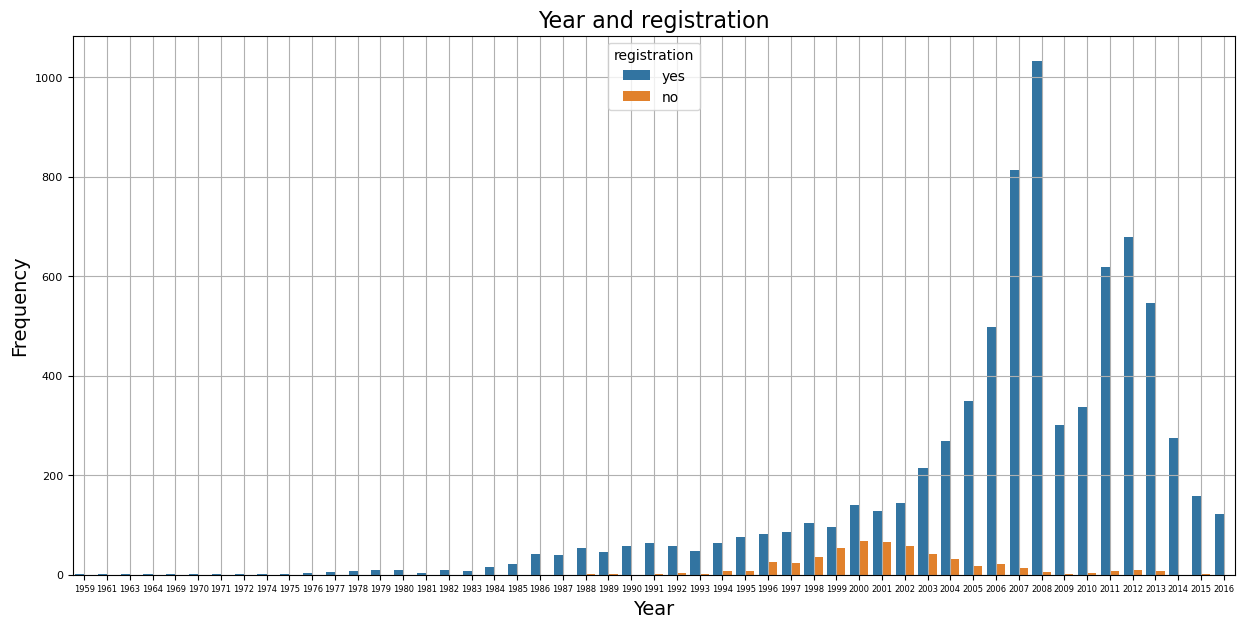

In [170]:
# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15, 7))

# Plot countplot of age concerning treatment
sns.countplot(x='year', hue='registration', data=copydata_out)

# Add some cosmetics
plt.title(label='Year and registration', size=16)
plt.xlabel(xlabel='Year', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=6)
plt.yticks(size=8)
plt.grid(visible=True)

# Display the plot
plt.show()

---
Observation: Non-registered cars are normally distributed between years 1992 and 2005
Insight: 1)The non-registered vehicles in years  1992 and 2005 needs to be worked upon
2) The non-registered vehicles after 2002 could be the 1st priority of sales 
---

# <a name = Section62></a>
# Question 5: What is the density distribution for price of cars?

<Figure size 1500x700 with 0 Axes>

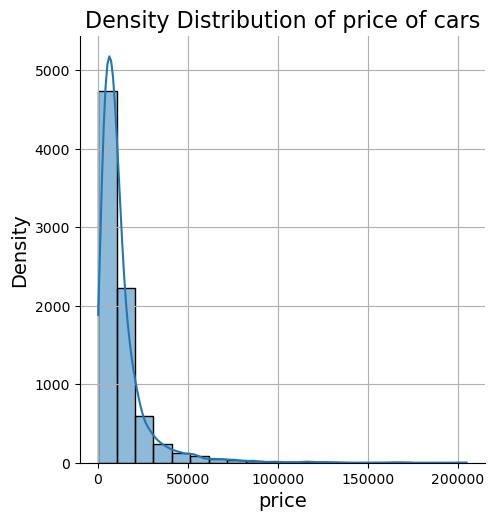

In [171]:
# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of price of car

sns.displot(copydata_out['price'], kde=True, bins=20)

# Add some cosmetics
plt.title(label='Density Distribution of price of cars', size=16)
plt.xlabel(xlabel='price', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.grid(visible=True)

#Compare the plot versus a normal distribution

# Display the plot
plt.show()

## ---
Observation: The density distrubution of car price is not a normal distribution and is right skewed
             The dataset's lower bounds for price are extremely low relative to the rest of the data, 
             this is causing the data to skew right.
             
Insight: The lower boundaries of the price of cars needs some more attention and needs to increase to effect in a 
normal distribution 

# <a name = Section62></a>
# Question 6: What is the price distribution for cars based on engine type and drive type?

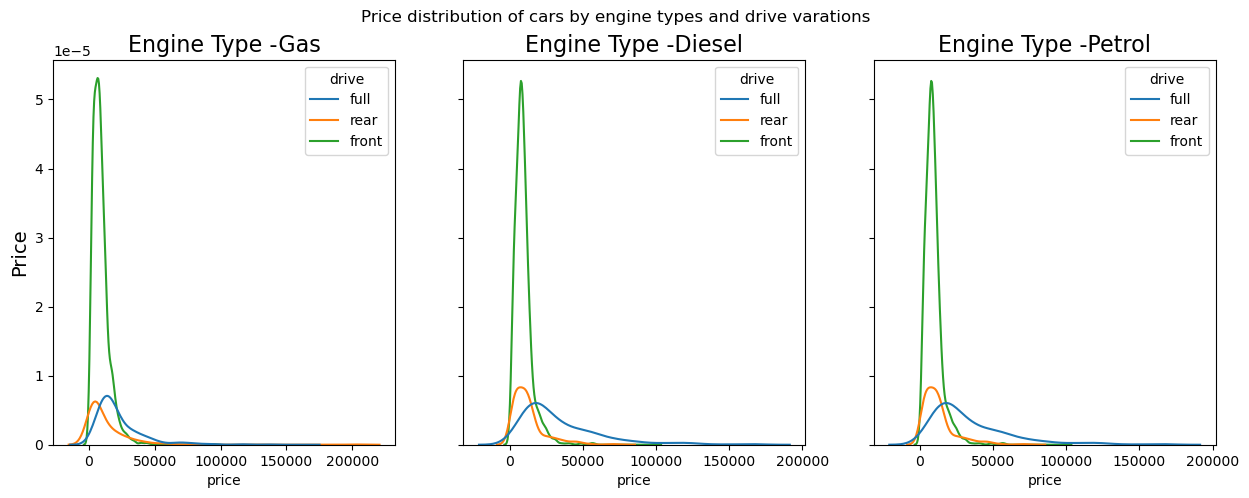

In [172]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Price distribution of cars by engine types and drive varations')

# Petrol
sns.kdeplot(ax=axes[0], x=copydata_out[copydata_out['engType']=="Petrol"]['price'], hue = copydata_out['drive'])


# Diesel
sns.kdeplot(ax=axes[1], x=copydata_out[copydata_out['engType']=="Diesel"]['price'], hue = copydata_out['drive'])


# Gas
sns.kdeplot(ax=axes[2], x=copydata_out[copydata_out['engType']=="Diesel"]['price'], hue = copydata_out['drive'])

# Initiate a list of engine types values and index
engine = list(copydata_out['engType'].unique())
custom_index = [0, 1, 2]

for i,j in  zip(engine, custom_index):
    axes[j].set_title(label='Engine Type -'+i, size=16)
    axes[j].set_ylabel(ylabel='Price', size=14)

Observation: The prices of Petrol cars, Diesel cars and Gas cars are normally distributed.
Insight: There is a right skew on all the 3 cases indicating more higher priced vehicles in the dataset. This could be looked at and worked upon 

# <a name = Section62></a>
# Question 7: How many vehicles across the 4 engine types do not have registration?

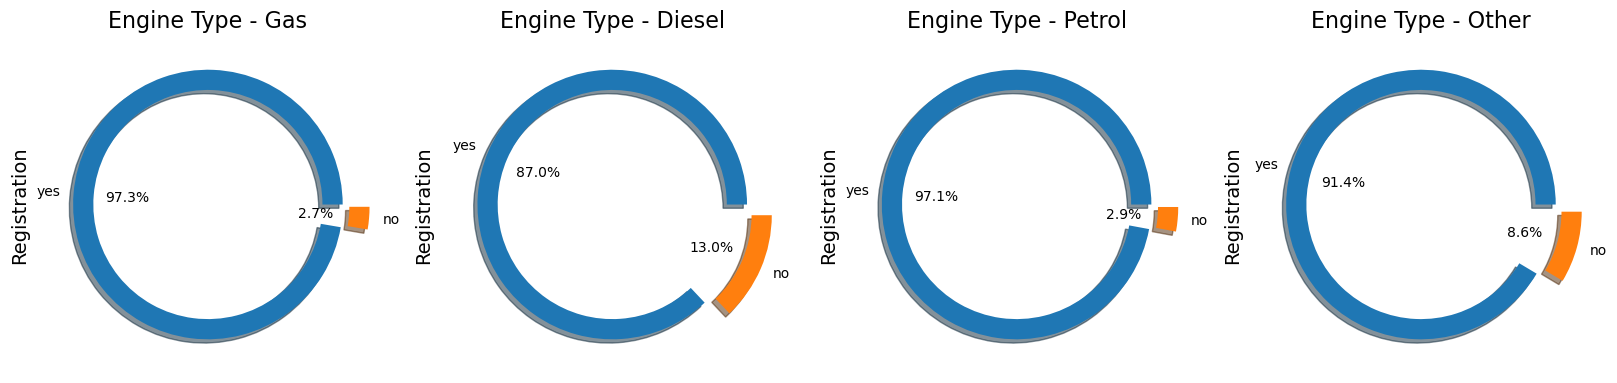

In [173]:
# Instantiate figure and axes object
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))

# Initiate a list of engine types values and index
engine = list(copydata_out['engType'].unique())
custom_index = [0, 1, 2, 3]

# Plot donut chart for each engine type whether they are registered or not
for i, j in zip(engine, custom_index):
  copydata_out['registration'][copydata_out['engType']==i].value_counts() \
                                              .plot \
                                              .pie(explode=[0, 0.2],
                                                   autopct='%1.1f%%',
                                                   wedgeprops=dict(width=0.15), 
                                                   ax=ax[j], shadow=True)
  # Add some cosmetics                                       
  ax[j].set_title(label='Engine Type - '+i, size=16)
  ax[j].set_ylabel(ylabel='Registration', size=14)


# Display the graph
plt.show()


Observation: There are around 2.8% non-registered petrol engine vehicles and 12.2% of those for diesel engine vehicles
Insight: The used car dealer has to work on process improvement in having all their used cars registered; in the order 
of diesel engine vehicles first as this would help sell them faster yielding to quicker revenue
'''

# <a name = Section7></a>

---
# **7. Summarization**

#### 7.1 Conclusion

The used cars sales EDA report has been helpful understanding the Buyer sentiment and contemplate on various factors that
have not contributed in sales. These points could give a direction in terms of improvements and immediate actionables

1. Petrol cars are most sold engine types and Other (Electric etc) are the least sold \

2. Non-registered cars are normally distributed between years 1992 and 2005

3. The density distrubution of car price is not a normal distribution and is right skewed.The dataset's lower bounds for price are extremely low relative to the rest of the data, 
   this is causing the data to skew right.

4. The prices of Petrol cars, Diesel cars and Gas cars are normally distributed.

5. There are around 2.8% non-registered petrol engine vehicles and 12.2% of those for diesel engine vehicles

6. Sedan is the most favorite car body style that customers prefer followed by crossover.    

#### 7.2 Actionable Insights

1. If the used car dealer has to enter the market of reselling Electric cars, a new strategy should be considered in selling
2. The non-registered vehicles in years  1992 and 2005 needs to be worked upon and the non-registered vehicles after 2002 could be the 1st priority of sales 
3. The lower boundaries of the price of cars needs some more attention and needs to increase to effect in a normal distribution 
4. The used car dealer has to work on process improvement in having all their used cars registered; in the order of diesel engine vehicles first as this would help sell them faster yielding to quicker revenue